#                                                           DRUG PREDICTING MODEL  

# Table of Contents

- [1. Importing Libraries](#1-Importing-Libraries)
- [2. Preparing the Dataset](#2-Preparing-the-Dataset)
- [3. Adding a new feature](#3-Adding-a-new-feature)
- [4. Encoding the values](#4-Encoding-the-values)
- [5. Defining features of (X) and (y)](#5-Defining-features-of-X-and-y)
- [6. Train-test split](#6-Train-test-split)
- [7. Normalize the features](#7-Normalize-the-features)
- [8. Training Decision Tree model](#8-Training-Decision-Tree-model)
- [9. Model Evaluation](#9-Model-Evaluation)
- [10. Visualization](#10-Visualization)
  - [10.1 Plotting pie chart](#101-Plotting-pie-chart)
  - [10.2 Plotting confusion matrix](#102-Plotting-confusion-matrix)
  - [10.3 Correlation Matrix](#103-Correlation-Matrix)
- [11. User Input](#11-User-Input)
- [12. Calculating the Na_to_K_ratio and taking Input data](#12-Calculating-the-Na_to_K_ratio-and-taking-Input-data)
- [13. Predicting the Drug](#13-Predicting-the-Drug)


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Preparing the Dataset

In [2]:
data = pd.read_csv("drug200.csv")
data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
171,45,M,LOW,NORMAL,10.017,drugX
136,55,F,HIGH,HIGH,10.977,drugB
181,59,F,NORMAL,HIGH,13.884,drugX
118,32,F,HIGH,NORMAL,10.292,drugA
26,31,M,HIGH,HIGH,30.366,DrugY
95,36,M,LOW,NORMAL,11.424,drugX
113,65,F,LOW,NORMAL,13.769,drugX
75,26,M,LOW,NORMAL,20.909,DrugY
140,49,M,HIGH,NORMAL,6.269,drugA
119,61,F,HIGH,HIGH,25.475,DrugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Adding a new feature

In [6]:
data['Na_to_K_ratio'] = data['Na_to_K'] / data['Age']

# Encoding the values

In [7]:
L_C = LabelEncoder()
data['Sex'] = L_C.fit_transform(data['Sex'])
data['BP'] = L_C.fit_transform(data['BP'])
data['Cholesterol'] = L_C.fit_transform(data['Cholesterol'])

# Defining features of (X) and (y)

In [8]:
X = data.drop(columns=['Drug'])
Y = data['Drug']

## Splitting the Dataset into Training and Testing Sets
<a id="Splitting-the-Dataset-into-Training-and-Testing-Sets"></a>
This line splits the dataset into training and testing sets.

- **`X_train` and `y_train`**: Contain 70% of the data for training the model.
- **`X_test` and `y_test`**: Contain 30% of the data for testing the model.
- **`test_size=0.3`**: Specifies that 30% of the data should be used for testing.
- **`random_state=42`**: Ensures reproducibility by setting a seed for the random splitting process.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalize the features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Tranning
<a id="Training-the-Decision-Tree-Classifier"></a>
This code initializes and trains a decision tree classifier.

- **`model = DecisionTreeClassifier(random_state=42)`**: Creates a decision tree model with a fixed random state for reproducibility.
- **`model.fit(X_train, y_train)`**: Trains the decision tree model using the training data (`X_train` and `y_train`).

In [11]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation
<a id="Predicting-on-the-Test-Set"></a>
This code generates predictions using the trained decision tree model.

- **`y_pred`**: Stores the predicted labels for the test set (`X_test`).
- **`model.predict(X_test)`**: Applies the model to the test data to predict the target values based on the learned patterns from the training data.

In [12]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [13]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 1.00
Confusion Matrix:
 [[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]


# Visualization

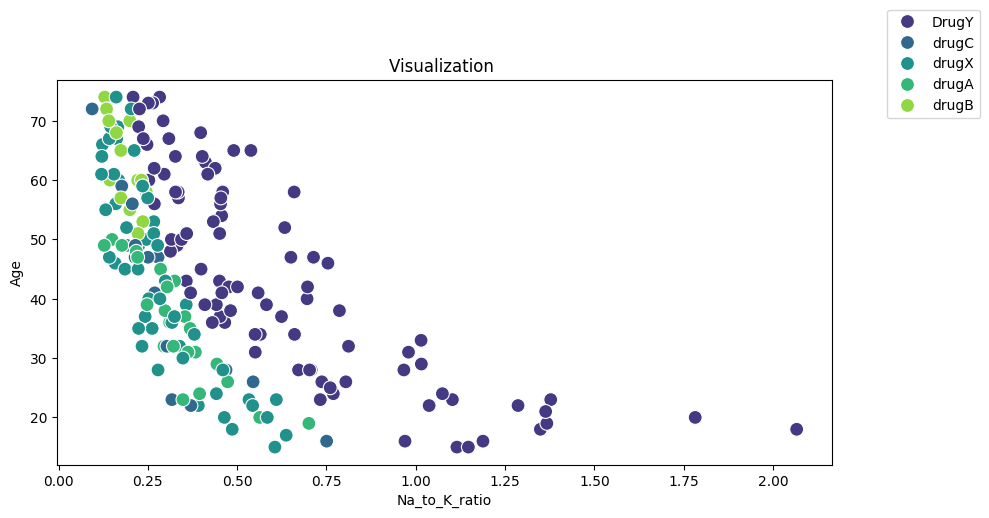

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Na_to_K_ratio', y='Age', hue=Y, palette="viridis", s=100)
plt.title("Visualization ")
plt.xlabel("Na_to_K_ratio")
plt.ylabel("Age")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.4, 0.2, 0.8))
plt.show()

# Plotting pie chart

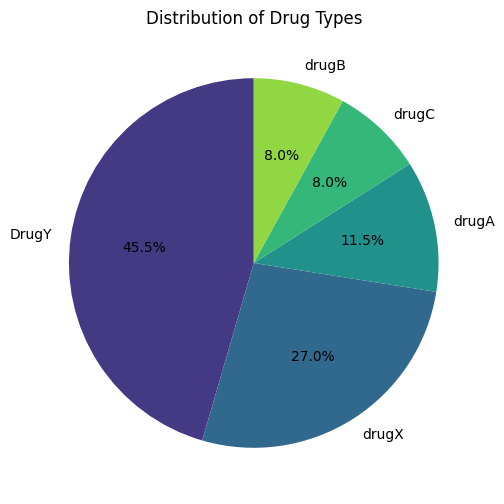

In [15]:
plt.figure(figsize=(6, 6))
Y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(Y.unique())))
plt.title("Distribution of Drug Types")
plt.ylabel('')
plt.show()

# Plotting confusion matrix

# [Heatmap Matrix](#Heatmap-Matrix) 
This code generates a heatmap of the confusion matrix:
- **sns.heatmap(CM, annot=True, fmt='d', cmap='Reds')**: Creates a heatmap with annotated values and a red color map to visualize the confusion matrix for drug predictions.
- **xticklabels and yticklabels**: Label the axes to indicate the predicted and actual drug types.
- **plt.title('Confusion Matrix Heatmap for Drug Prediction')**: Adds a title to the heatmap.
- **plt.show()**: Displays the heatmap, providing insight into the performance of the drug classification model.


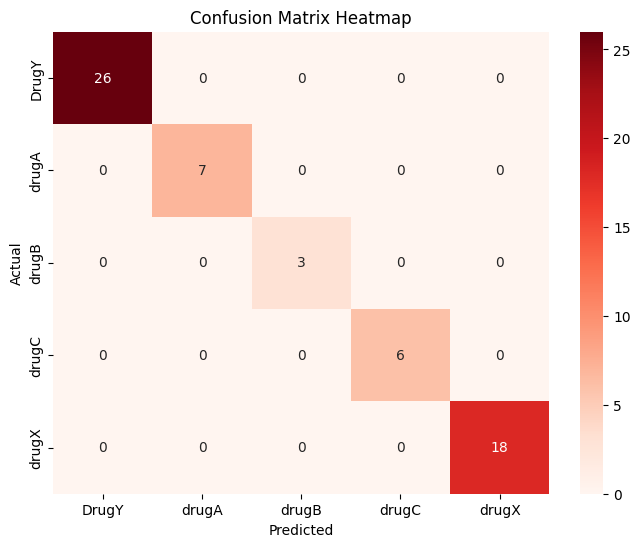

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Correlation Matrix
# [Correlation Matrix](#Correlation-Matrix)

This code generates a heatmap of the correlation matrix:

- **plt.figure(figsize=(10, 8))**: Sets the figure size for the correlation matrix plot.
- **correlation_matrix = data.drop(columns=['Drug']).corr()**: Calculates the correlation matrix for the dataset, excluding the 'Drug' column.
- **sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)**: Creates a heatmap with annotated values, using a 'coolwarm' color map, to visualize the correlation matrix.
- **plt.titl

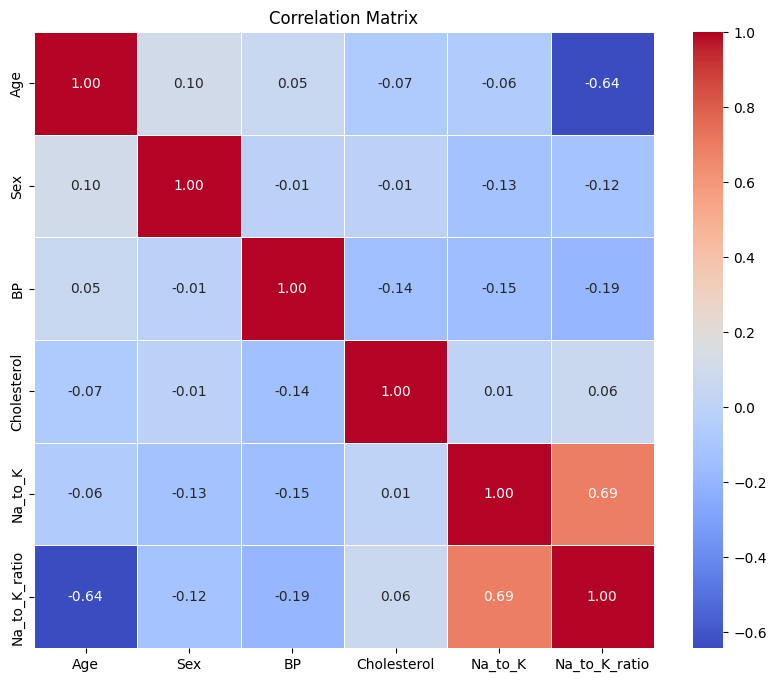

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.drop(columns=['Drug']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# User Input

In [18]:
def predicting_drug(data, model):
    p = model.predict(data)
    P_C = p[0]
    return P_C
user_age = float(input("Enter your Age: "))
user_na_to_k = float(input("Enter your Na_to_K Ratio: "))

# Convert sex input to integer
user_sex_input = input("Enter your Sex (F for Female, M for Male): ").strip().upper()
if user_sex_input == 'F':
    user_sex = 0  
elif user_sex_input == 'M':
    user_sex = 1  
else:
    print("Invalid input for sex. Please enter 'F' or 'M'.")
    user_sex = int(input("Enter 0 for Female, 1 for Male: "))  # Ask again if invalid

# Get and classify cholesterol status
cholesterol_value = float(input("Enter your Cholesterol value: "))
normal_threshold = 200 
high_threshold = 240  

if cholesterol_value < normal_threshold:
    cholesterol_status = "LOW"
    cholesterol_code = 0
elif normal_threshold <= cholesterol_value < high_threshold:
    cholesterol_status = "NORMAL"
    cholesterol_code = 1
else:
    cholesterol_status = "HIGH"
    cholesterol_code = 2

user_bp_value = float(input("Enter your Blood Pressure value: "))
if user_bp_value < 100:
    user_bp = 0  
    bp_status = "LOW"
elif 100 <= user_bp_value < 120:
    user_bp = 1  
    bp_status = "NORMAL"
else:
    user_bp = 2  
    bp_status = "HIGH"

print(f"Blood Pressure Status: {bp_status}")
print(f"Cholesterol Status: {cholesterol_status}")
print(f"User Age = {user_age} | Na_to_K Ratio = {user_na_to_k} | Blood Pressure Status = {bp_status} | Cholesterol Status = {cholesterol_status}")

Enter your Age:  15
Enter your Na_to_K Ratio:  1
Enter your Sex (F for Female, M for Male):  M
Enter your Cholesterol value:  12
Enter your Blood Pressure value:  110


Blood Pressure Status: NORMAL
Cholesterol Status: LOW
User Age = 15.0 | Na_to_K Ratio = 1.0 | Blood Pressure Status = NORMAL | Cholesterol Status = LOW


# Calculating the Na_to_K_ratio and taking Input data

In [19]:
user_na_to_k_ratio = user_na_to_k / user_age
user_data = np.array([[user_age, user_sex, user_bp, cholesterol_code, user_na_to_k, user_na_to_k_ratio]])
user_data = scaler.transform(user_data)

# Predict drug type
predicted_drug = predicting_drug(user_data, model)
print(f"Predicted Drug = {predicted_drug}")

Predicted Drug = drugC


# Predicting the Drug 

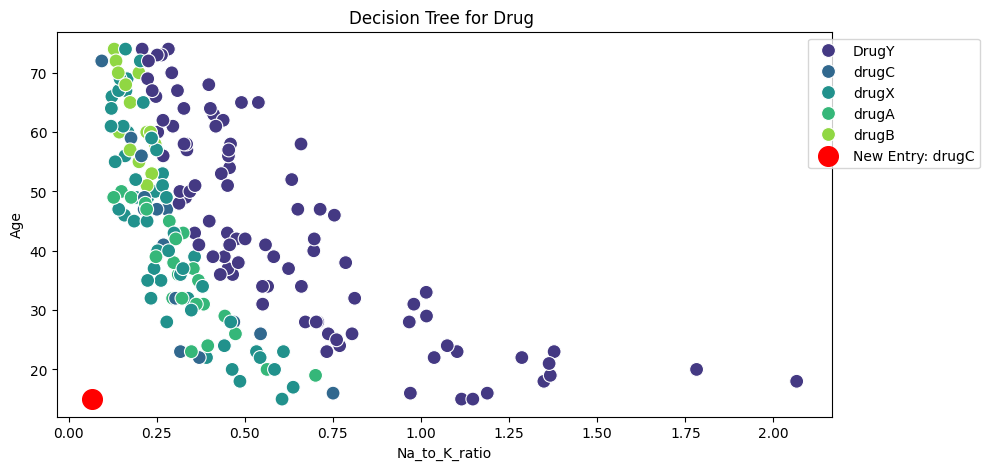

User Age = 15.0 | Na_to_K Ratio = 1.0 | Predicted Drug = drugC


In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Na_to_K_ratio', y='Age', hue=Y, palette="viridis", s=100)
plt.scatter(user_na_to_k_ratio, user_age, color='red', s=200, label=f'New Entry: {predicted_drug}')
plt.title("Decision Tree for Drug ")
plt.xlabel("Na_to_K_ratio")
plt.ylabel("Age")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.2, 0.2, 0.8))
plt.show()

print(f"User Age = {user_age} | Na_to_K Ratio = {user_na_to_k} | Predicted Drug = {predicted_drug}")

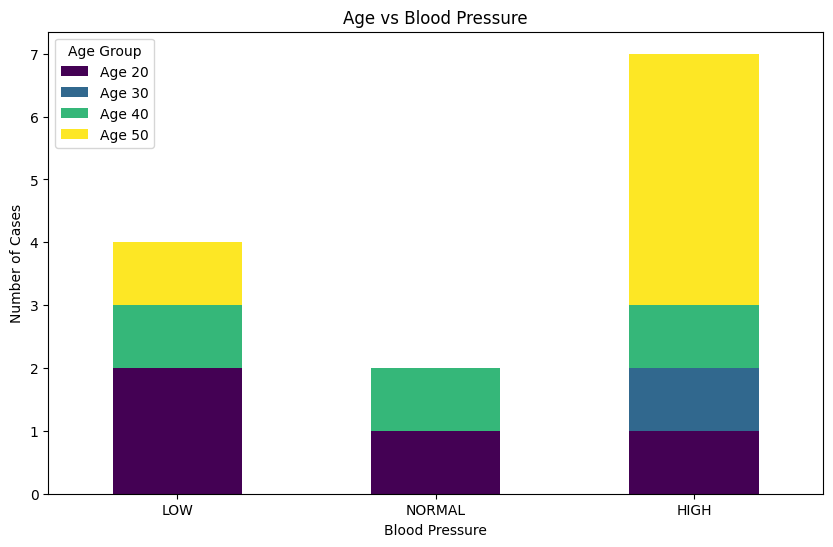

In [28]:
desired_ages = [20, 30, 40, 50]  
filtered_data = data[data['Age'].isin(desired_ages)]
age_bp_data = filtered_data.groupby(['BP', 'Age']).size().unstack().fillna(0)
age_bp_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Age vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Number of Cases")
plt.xticks(ticks=range(len(age_bp_data.index)), labels=['LOW', 'NORMAL', 'HIGH'], rotation=0)
plt.legend(title='Age Group', labels=[f'Age {age}' for age in desired_ages])
plt.show()